In [1]:
# prompt: install and import opendataset

!pip install opendatasets


In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rezalesmana/tally-marks-dataset")


100%|██████████| 37.9M/37.9M [00:00<00:00, 164MB/s]


In [3]:
# prompt: collcet the folder names from the base folder

import os

base_folder = "/content/tally-marks-dataset"

folders = [f for f in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, f))]

for folder in folders:
    print(folder)


5
2
4
1
X
3


In [4]:
base_dir = '/content/tally-marks-dataset'

In [6]:
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

val_dir = os.path.join(base_dir, 'val')
os.makedirs(val_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [7]:

import shutil

# List of class folder names
class_folders = folders
# Split ratios (adjust these as needed)
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

for folder in class_folders:
    source_folder = os.path.join(base_dir, folder)
    train_dest = os.path.join(train_dir, folder)
    val_dest = os.path.join(val_dir, folder)
    test_dest = os.path.join(test_dir, folder)

    os.makedirs(train_dest, exist_ok=True)
    os.makedirs(val_dest, exist_ok=True)
    os.makedirs(test_dest, exist_ok=True)

    filenames = os.listdir(source_folder)
    num_files = len(filenames)

    num_train = int(num_files * train_ratio)
    num_val = int(num_files * val_ratio)

    train_files = filenames[:num_train]
    val_files = filenames[num_train:num_train + num_val]
    test_files = filenames[num_train + num_val:]

    for file in train_files:
        src_path = os.path.join(source_folder, file)
        dest_path = os.path.join(train_dest, file)
        shutil.copy(src_path, dest_path)

    for file in val_files:
        src_path = os.path.join(source_folder, file)
        dest_path = os.path.join(val_dest, file)
        shutil.copy(src_path, dest_path)

    for file in test_files:
        src_path = os.path.join(source_folder, file)
        dest_path = os.path.join(test_dest, file)
        shutil.copy(src_path, dest_path)



In [8]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [9]:

size = 64

batch_size = 32
target_size = (size,size)  # Adjust as needed

train_datagen = ImageDataGenerator(
    rescale=1./255,
    )

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False)

Found 30982 images belonging to 6 classes.
Found 3870 images belonging to 6 classes.
Found 3879 images belonging to 6 classes.


In [22]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# First convolutional unit
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(size, size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional unit
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dense layers
model.add(Flatten())
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 16)        2320      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 16)         

In [23]:
history = model.fit(train_generator, epochs = 5, validation_data = val_generator)

Epoch 1/5
969/969 [==============================] - 17s 16ms/step - loss: 0.2956 - accuracy: 0.8924 - val_loss: 0.1311 - val_accuracy: 0.9568
Epoch 2/5
969/969 [==============================] - 16s 17ms/step - loss: 0.1016 - accuracy: 0.9642 - val_loss: 0.0927 - val_accuracy: 0.9698
Epoch 3/5
969/969 [==============================] - 15s 16ms/step - loss: 0.0680 - accuracy: 0.9752 - val_loss: 0.0930 - val_accuracy: 0.9703
Epoch 4/5
969/969 [==============================] - 17s 18ms/step - loss: 0.0532 - accuracy: 0.9820 - val_loss: 0.0543 - val_accuracy: 0.9796
Epoch 5/5
969/969 [==============================] - 18s 18ms/step - loss: 0.0465 - accuracy: 0.9842 - val_loss: 0.0616 - val_accuracy: 0.9796


In [24]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

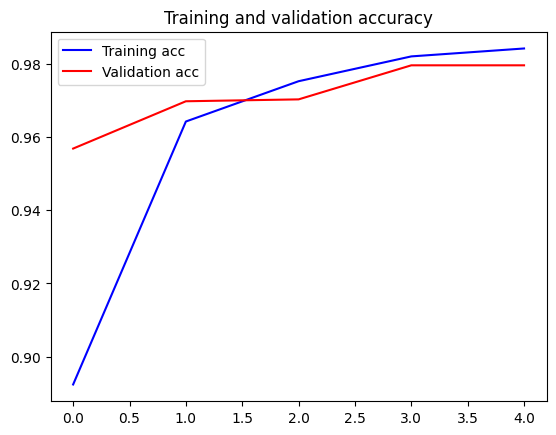

<Figure size 640x480 with 0 Axes>

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

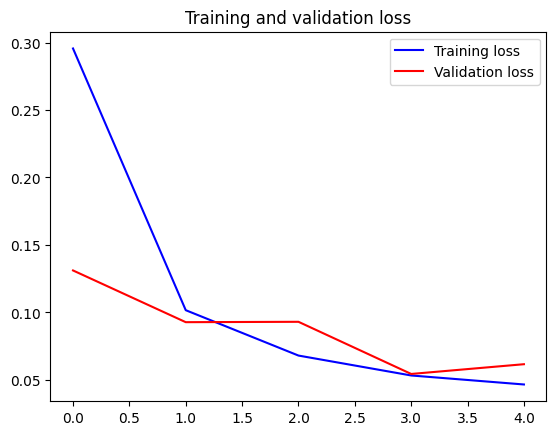

In [26]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

122/122 [==============================] - 2s 15ms/step - loss: 0.0541 - accuracy: 0.9820
Test Loss: 0.0541
Test Accuracy: 0.9820


In [28]:
import numpy as np
test_labels = np.array(test_generator.labels)

122/122 [==============================] - 4s 30ms/step


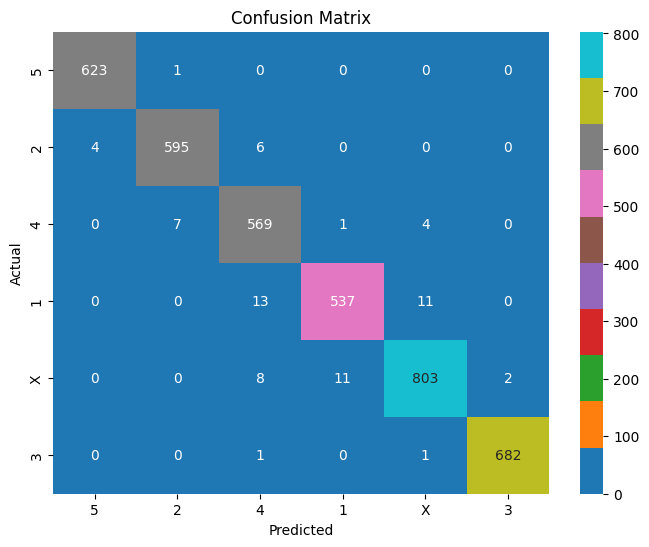

Precision: 0.9983221476510067
Recall: 0.993322203672788
F1 Score: 0.9958158995815899


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and compiled your model
# train_ds is your training dataset

# Make predictions using the trained model
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the actual labels from the dataset

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(test_labels, predicted_labels)
classes = class_folders


import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have already trained and compiled your model
# train_ds is your training dataset
classes = class_folders

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='tab10',
            xticklabels=classes, yticklabels=classes)  # Replace 'classes' with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

cm= confusion_mtx
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]


# Calculate metrics
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)